<a href="https://colab.research.google.com/github/Affreenunisa/Affreenunisa/blob/main/cat_and_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:03<00:00, 251MB/s]
100% 1.06G/1.06G [00:04<00:00, 280MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip")
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
import tensorflow as tf
import numpy as np

from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D,Flatten,BatchNormalization
from keras.layers import Dropout
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

In [ ]:
conv_base = VGG16(
    weights ='imagenet',
    include_top = False,
    input_shape =(256,256,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.trainable = False


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
batch_size = 32
train_datagen =ImageDataGenerator(
    rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode="binary")

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
train_generator

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    epochs =10,
                    validation_data=validation_generator)

Epoch 1/10
625/625 [==============================] - 369s 574ms/step - loss: 0.3673 - accuracy: 0.8577 - val_loss: 0.1584 - val_accuracy: 0.9358
Epoch 2/10
625/625 [==============================] - 358s 573ms/step - loss: 0.2060 - accuracy: 0.9136 - val_loss: 0.1927 - val_accuracy: 0.9154
Epoch 3/10
625/625 [==============================] - 358s 573ms/step - loss: 0.1807 - accuracy: 0.9248 - val_loss: 0.1506 - val_accuracy: 0.9394
Epoch 4/10
625/625 [==============================] - 355s 567ms/step - loss: 0.1688 - accuracy: 0.9287 - val_loss: 0.1392 - val_accuracy: 0.9410
Epoch 5/10
625/625 [==============================] - 359s 574ms/step - loss: 0.1570 - accuracy: 0.9347 - val_loss: 0.1849 - val_accuracy: 0.9152
Epoch 6/10
625/625 [==============================] - 354s 567ms/step - loss: 0.1471 - accuracy: 0.9392 - val_loss: 0.1451 - val_accuracy: 0.9384
Epoch 7/10
625/625 [==============================] - 366s 585ms/step - loss: 0.1433 - accuracy: 0.9416 - val_loss: 0.1341 -

In [ ]:
from keras.callbacks import History

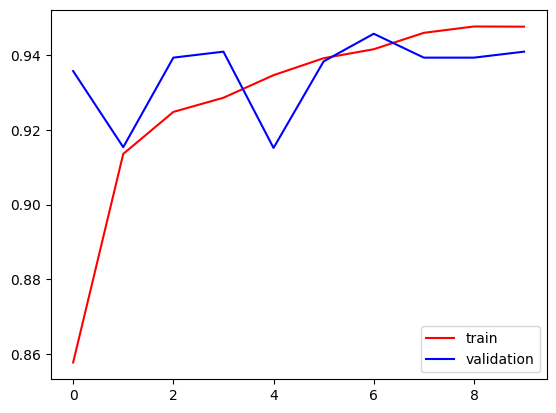

In [ ]:
import matplotlib.pyplot as plt

# Replace 'history['accuracy']' with 'history.history['accuracy']'
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color="blue", label='validation')
plt.legend()
plt.show()


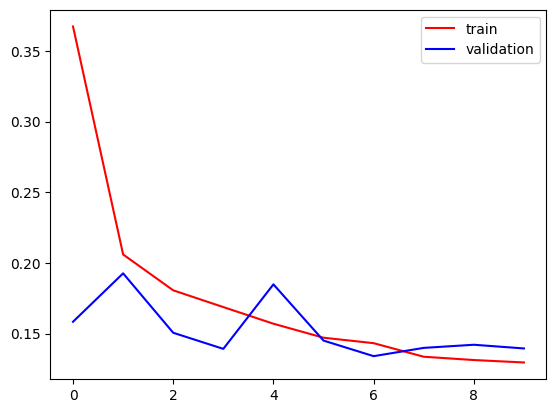

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color="blue",label='validation')
plt.legend()
plt.show()

In [ ]:
!ls -l /content/cat.jpeg

-rw-r--r-- 1 root root 5821 Apr 15 16:29 /content/cat.jpeg


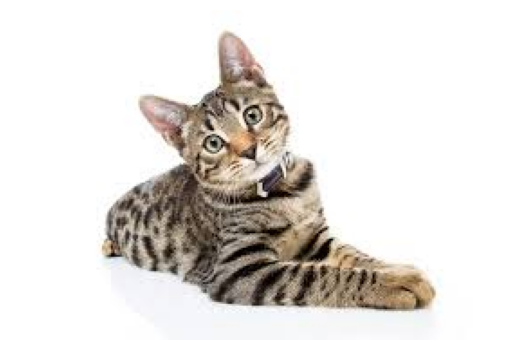

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
test_img = cv2.imread('/content/cat.jpeg')

# Check if the image loaded successfully
if test_img is None:
    print("Error: Could not load the image.")
else:
    # Convert BGR to RGB
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(test_img)
    plt.axis('off')  # Turn off axis
    plt.show()


In [ ]:
try:
    test_img = cv2.imread('content/cat.jpg')
    if test_img is None:
        print("Image is corrupted.")
except Exception as e:
    print("Error reading image:", e)

Image is corrupted.


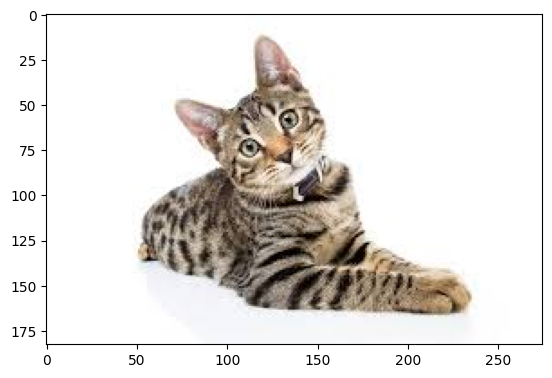

In [ ]:

test_img = cv2.imread('/content/cat.jpeg')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
test_img = test_img.astype(np.float32) / 255.0
plt.imshow(test_img)
plt.show()

In [ ]:
test_img.shape

(183, 275, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
result(test_input)

1/1 [==============================] - 0s 17ms/step


'Dog'

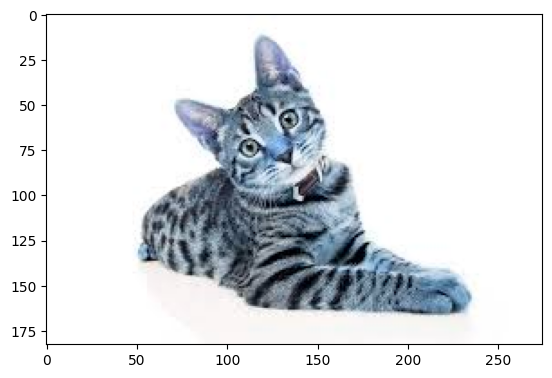

In [ ]:
test_img=cv2.imread('/content/cat.jpeg')
plt.imshow(test_img)

In [ ]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
result(test_input)

1/1 [==============================] - 0s 156ms/step


'Cat'

In [ ]:
test_img = cv2.imread('/content/dog.jpg')


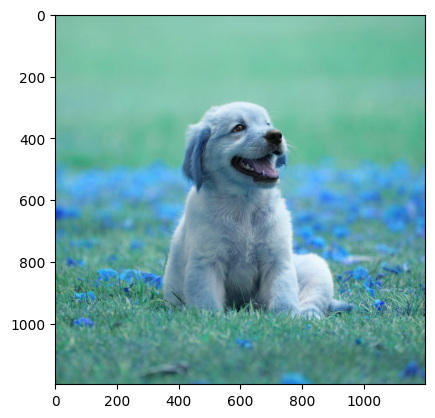

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(1197, 1200, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
result(test_input)

1/1 [==============================] - 0s 18ms/step


'Dog'

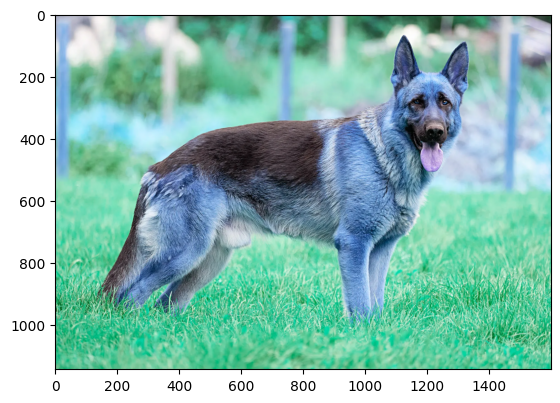

In [ ]:
test_img=cv2.imread('/content/persian.webp')
plt.imshow(test_img)

In [ ]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
result(test_input)

1/1 [==============================] - 0s 18ms/step


'Dog'